Loading and preprocessing data...
Performing silhouette method...


Calculating silhouette scores: 100%|██████████| 9/9 [07:46<00:00, 51.81s/it]

Plotting silhouette scores...


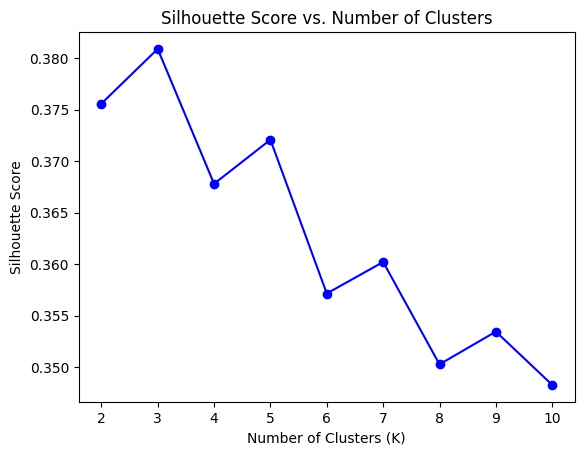

The optimal number of clusters (K) is: 3


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

def load_data(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df):
    # Convert 'peak time' to datetime if it's not already
    df['peak time'] = pd.to_datetime(df['peak time'])
    
    # Extract relevant features
    features = df[['peak time', 'peak(dB)']].copy()
    
    # Convert 'peak time' to a numeric value (seconds since epoch)
    features['peak time'] = features['peak time'].astype(np.int64) / 10**9
    
    # Normalize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    return scaled_features

def silhouette_method(data, max_k=10, sample_size=60000):
    silhouette_scores = []
    k_values = range(2, max_k + 1)  # Start from 2 as silhouette score is not defined for k=1
    
    # If the dataset is too large, use a sample
    if len(data) > sample_size:
        data = data[np.random.choice(data.shape[0], sample_size, replace=False)]
    
    for k in tqdm(k_values, desc="Calculating silhouette scores"):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    return k_values, silhouette_scores

def plot_silhouette_scores(k_values, silhouette_scores):
    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()

def find_optimal_k(k_values, silhouette_scores):
    return k_values[np.argmax(silhouette_scores)]

def main(file_path):
    print("Loading and preprocessing data...")
    df = load_data(file_path)
    scaled_features = preprocess_data(df)
    
    print("Performing silhouette method...")
    k_values, silhouette_scores = silhouette_method(scaled_features)
    
    print("Plotting silhouette scores...")
    plot_silhouette_scores(k_values, silhouette_scores)
    
    optimal_k = find_optimal_k(k_values, silhouette_scores)
    print(f"The optimal number of clusters (K) is: {optimal_k}")

if __name__ == "__main__":
    file_path = "data/iris-event-list.csv"
    main(file_path)